# Testing of the trained Keras model on the test dataset

## Importing the test dataset and loading it into a list:


In [1]:
import os
from PIL import Image

test_images = []

# Get the file paths of the test images
test_dir = 'test'
for filename in os.listdir(test_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        image_path = os.path.join(test_dir, filename)
        test_images.append(image_path)

# Load the test images
loaded_images = []
for image_path in test_images:
    image = Image.open(image_path)
    loaded_images.append(image)


## Manipulating image array and Training:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
from PIL import Image

# Load the trained Keras model
keras.config.enable_unsafe_deserialization()
model = keras.models.load_model(os.path.abspath('models/single.keras'))

# Resize the images to 256x256x3 pixels
resized_images = [image.resize((256, 256)) for image in loaded_images]

predicted_masks = []

# Predict the masks for the test images
for image in resized_images:
    image_array = np.array(image)
    image_array = image_array / 255.0
    image_array = np.expand_dims(image_array, axis=0)
    predicted_mask = model.predict(image_array)
    predicted_mask = predicted_mask[0, :, :, 0]
    predicted_mask = (predicted_mask > 0.5).astype(np.uint8)
    predicted_mask = (Image.fromarray(predicted_mask * 255)).convert('L')
    predicted_masks.append(predicted_mask)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━

## Results for the U-Net Model:

<Figure size 2000x1000 with 0 Axes>

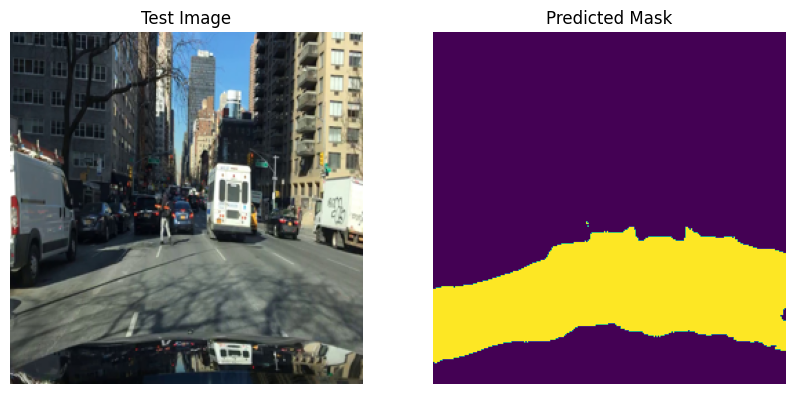

In [9]:
import random
plt.figure(figsize=(20, 10))
i = random.randint(0, len(resized_images))

plt.figure(figsize=(10, 5))

# Display the test image
plt.subplot(1, 2, 1)
plt.imshow(resized_images[i])
plt.title('Test Image')
plt.axis('off')


# Display the predicted mask
plt.subplot(1, 2, 2)
plt.imshow(predicted_masks[i])
plt.title('Predicted Mask')
plt.axis('off')

plt.show()


In [4]:
#save the masks
for i, mask in enumerate(predicted_masks):
    mask.save(f'mask_{i}.png')

## Proportions:


Proportion of target color area: 30.45%


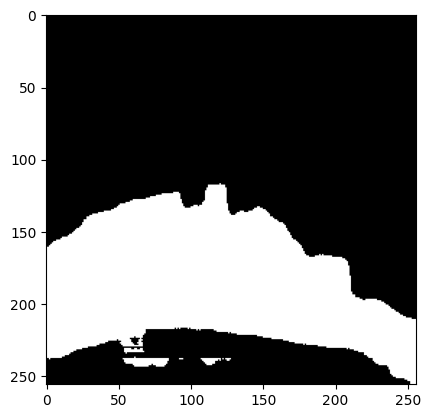

In [10]:
import cv2


def get_color_proportion(image, target_color):
  """
  Calculates the proportion of a specific color area in an RGB image.

  Args:
      image: RGB image as a NumPy array.
      target_color: Target color to calculate proportion for (BGR format).

  Returns:
      The proportion of the target color area as a float between 0 and 1.
  """
  # Convert image to BGR format (OpenCV uses BGR)
  image_bgr = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

  # Convert target color to NumPy array
  target_color_np = np.array(target_color, dtype="uint8")

  # Create a mask where only target color pixels remain white
  mask = cv2.inRange(image_bgr, target_color_np, target_color_np)

  # Count the number of non-zero pixels (target color pixels)
  color_pixels = cv2.countNonZero(mask)

  # Calculate the total number of pixels in the image
  total_pixels = image.shape[0] * image.shape[1]

  # Calculate the proportion of target color pixels (float division)
  proportion = color_pixels / total_pixels

  return proportion*100

target_color = (255, 255, 255)
proportion = get_color_proportion(cv2.imread('mask_0.png'), target_color)
plt.imshow(cv2.imread('mask_0.png'))

print(f"Proportion of target color area: {proportion:.2f}%")

